In [2]:
import networkx as nx
import numpy as np
from pymlfunc import tictoc

%matplotlib inline
import matplotlib.pyplot as plt

def display_graph_plotly(graph, labels):
#     graph=nx.Graph()#  G is an empty Graph
#     graph.add_nodes_from(nodes)
#     graph.add_edges_from(edges)

    # pos=nx.fruchterman_reingold_layout(graph)   
    pos = nx.spring_layout(graph, weight='strength', iterations=3000)

    Xn=[pos[k][0] for k in range(len(pos))]
    Yn=[pos[k][1] for k in range(len(pos))]

    trace_nodes=dict(type='scatter',
                     x=Xn, 
                     y=Yn,
                     mode='markers',
                     marker=dict(size=28, color='rgb(0,240,0)'),
                     text=labels,
                     hoverinfo='text')

    Xe=[]
    Ye=[]
    for e in graph.edges():
        Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
        Ye.extend([pos[e[0]][1], pos[e[1]][1], None])

    trace_edges=dict(type='scatter',
                     mode='lines',
                     x=Xe,
                     y=Ye,
                     line=dict(width=1, color='rgb(25,25,25)'),
                     hoverinfo='none' 
                    )

    axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
              zeroline=False,
              showgrid=False,
              showticklabels=False,
              title='' 
              )
    layout=dict(title= 'My Graph',  
                font= dict(family='Balto'),
                width=600,
                height=600,
                autosize=False,
                showlegend=False,
                xaxis=axis,
                yaxis=axis,
                margin=dict(
                l=40,
                r=40,
                b=85,
                t=100,
                pad=0,

        ),
        hovermode='closest',
        plot_bgcolor='#efecea', #set background color            
        )


    fig = dict(data=[trace_nodes, trace_edges], layout=layout)
    iplot(fig)

In [3]:
def add_random_weights(graph):
    new_edges = []
    old_edges = list(graph.edges())
    for edge in old_edges:
        new_edge = (edge[0], edge[1], np.abs(np.random.randn(1)[0]))
        new_edges.append(new_edge)
    graph.remove_edges_from(old_edges)
    graph.add_weighted_edges_from(new_edges)
    
def display_graph_mpl(graph, labels):
    edges = graph.edges()
    weights = [graph[u][v]['weight'] for u,v in edges]
    nx.draw_networkx(graph, pos=None, edges=edges, width=weights)
    plt.show()

def generate_random_graph(nnodes, nedges):
    labels = [str(i+1) for i in range(nnodes)]
    p = nedges / (nnodes * (nnodes-1) / 2)
    graph = nx.generators.random_graphs.fast_gnp_random_graph(nnodes, p)
    add_random_weights(graph)
    return graph, labels


In [4]:
def calc_average_shortest_path_length(graph):
    Ls = []
    for g in nx.connected_component_subgraphs(graph):
        Ls.append(nx.average_shortest_path_length(g))
    L = np.mean(Ls)
    return L

def calc_sigma(graph):
    niter=10
    nrand=10
    # Compute the mean clustering coefficient and average shortest path length
    # for an equivalent random graph
    randMetrics = {"Cr": [], "Cl": [], "L": []}
    C = nx.transitivity(graph)
    L = calc_average_shortest_path_length(graph)
        
#     L = nx.average_shortest_path_length(graph)
    
    if C==0:
        C = 0.001
    for _ in range(nrand):
        Gr = nx.random_reference(graph, niter=niter)
        randMetrics["Cr"].append(nx.transitivity(Gr))
        randMetrics["L"].append(calc_average_shortest_path_length(Gr))

    Cr = np.mean(randMetrics["Cr"])
    Lr = np.mean(randMetrics["L"])

    sigma = (C / Cr) / (L / Lr)
    
    print('C={} Cr={} L={} Lr={}, sigma={}'.format(C, Cr, L, Lr, sigma))
    
def calc_small_world(graph):
    with tictoc('average_clustering'):
        C = nx.average_clustering(graph)
#     with tictoc('transitivity'):
#         C_ = nx.transitivity(graph)
    L = calc_average_shortest_path_length(graph)
    
    niter=100
    nnodes = len(graph.nodes())
#     nedges = len(graph.edges())
#     p = nedges / (nnodes * (nnodes-1) / 2)
    p = 0.5
    randMetrics = {"Cr": [], "Lr": []}
    for _ in range(niter):
        Gr = nx.generators.random_graphs.fast_gnp_random_graph(nnodes, p)
        add_random_weights(Gr)
        randMetrics["Cr"].append(nx.average_clustering(Gr))
        randMetrics["Lr"].append(calc_average_shortest_path_length(Gr))
    
    Cr = np.mean(randMetrics["Cr"])
    Lr = np.mean(randMetrics["Lr"])

    Cn = C / Cr
    Ln = L / Lr
    
    sigma = (C / Cr) / (L / Lr)
#     print('C={} Cr={} L={} Lr={}, sigma={}'.format(C, Cr, L, Lr, sigma))
    print('Cn = {}, Ln = {}'.format(Cn, Ln))

/Users/yfukuzaw/workspace/koe/.venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


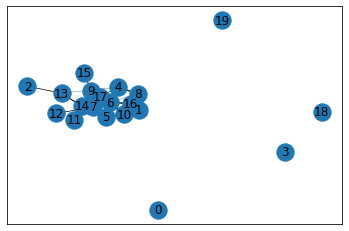

average_clustering: finished in  0.001188993 seconds
Cn = 0.4201140494575552, Ln = 0.28002947678703016


In [5]:
Grand, labels = generate_random_graph(20, 40)
display_graph_mpl(Grand, labels)
calc_small_world(Grand)

In [1]:
Glattice = nx.generators.lattice.triangular_lattice_graph(8, 5)
add_random_weights(Glattice)
display_graph_mpl(Glattice, labels=None)
calc_small_world(Glattice)

NameError: name 'nx' is not defined

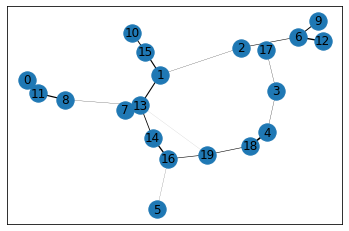

average_clustering: finished in  0.000319958 seconds
Cn = 0.0, Ln = 2.6414302207605913


In [172]:
Gws = nx.generators.random_graphs.watts_strogatz_graph(20, 2, 0.9)
add_random_weights(Gws)
display_graph_mpl(Gws, labels=None)
# calc_sigma(Gws)
calc_small_world(Gws)

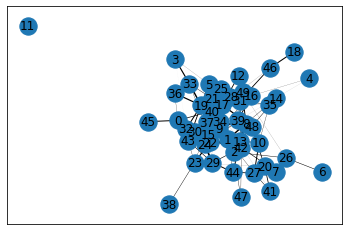

average_clustering: finished in  0.001088858 seconds
Cn = 0.15236136411126605, Ln = 0.9002015635455601


In [158]:
Grenyi = nx.generators.random_graphs.fast_gnp_random_graph(50, 0.07)
add_random_weights(Grenyi)
display_graph_mpl(Grenyi, labels=None)
calc_small_world(Grenyi)